___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

## Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)
# rename ile gerekli sütunların adını yeniden adlandırıyoruz. (Daha düzgün olması için)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.drop(columns=['CustomerID'],axis=1,inplace=True)
# Clustering ve PCA ile çalışırken sadece numerik veriler kullanılmalıdır.

In [8]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

In [ ]:
# df.Gender.replace('Male',0, inplace=True)
# df.Gender.replace('Female',1, inplace=True)
# Kategorik olan Gender sütunumuzu numerik verilere dönüştürüyoruz. Bunu get_dummies le de yapabilirdik. 

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





---
---

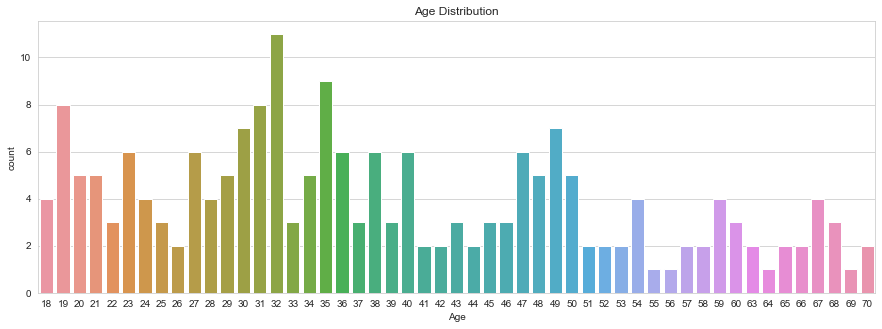

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

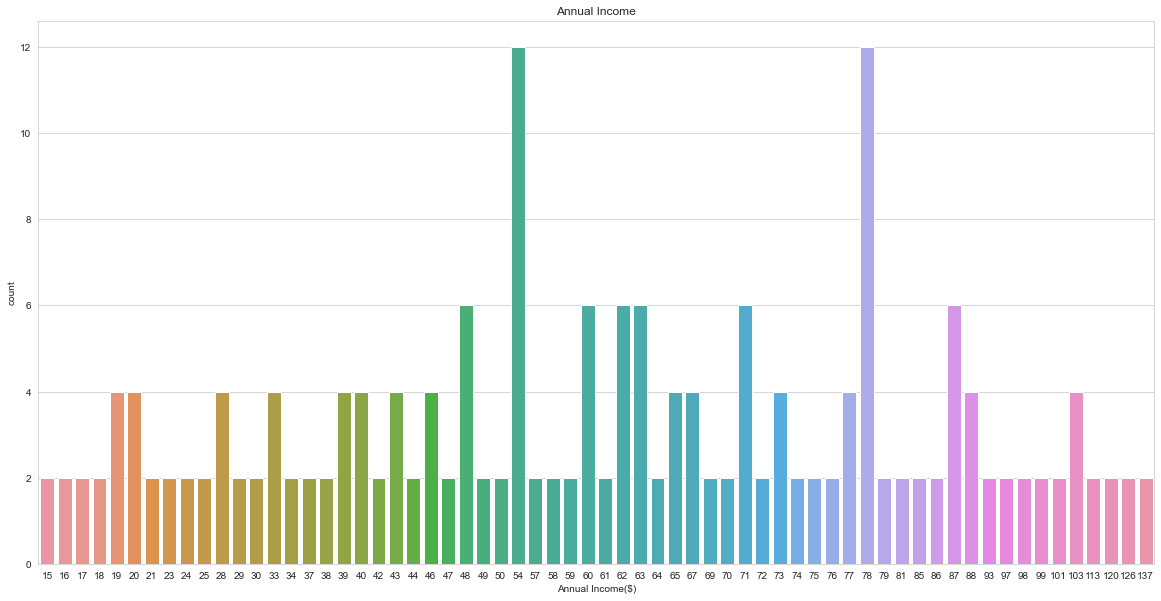

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x='Annual_Income', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show();

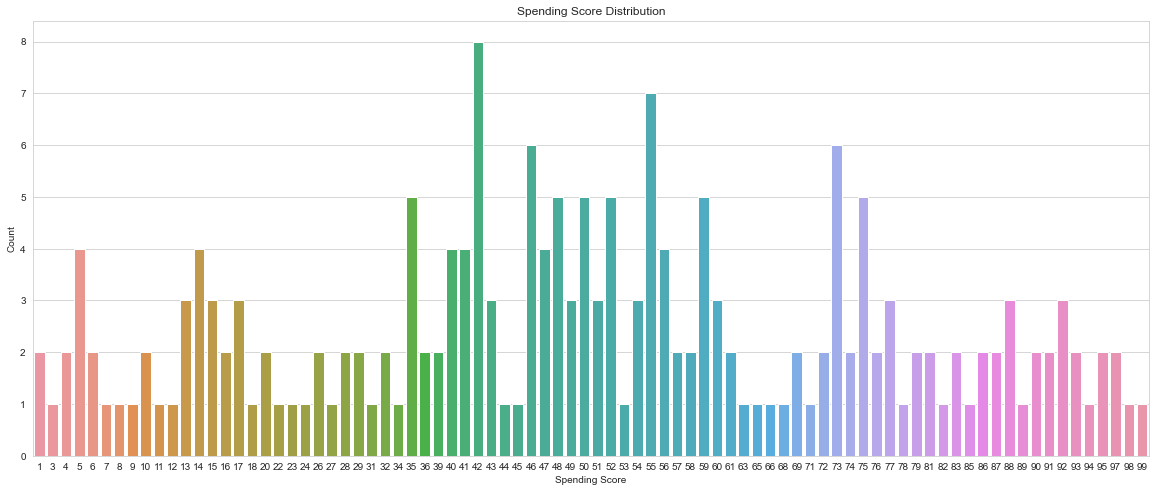

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(x='Spending_Score', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show();

Text(0, 0.5, 'Count')

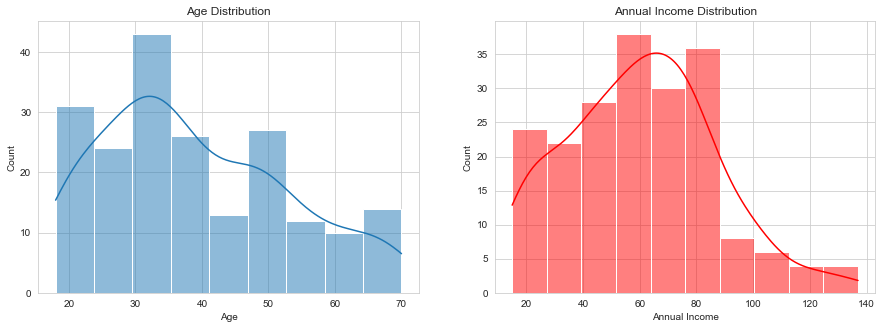

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(x ='Annual_Income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
# Yaş ve yıllık gelir in dağılımını kontrol ediyoruz.

(-1.25, 1.25, -1.25, 1.25)

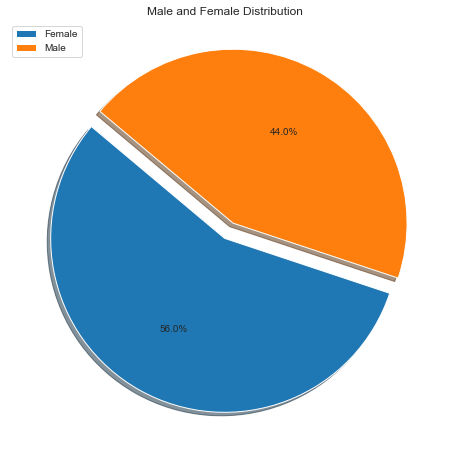

In [14]:
plt.figure(figsize=(8,8))

explode = [0,0.1] # Piechart ın oranları arasındaki boşluğu belirliyor
plt.pie(df['Gender'].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

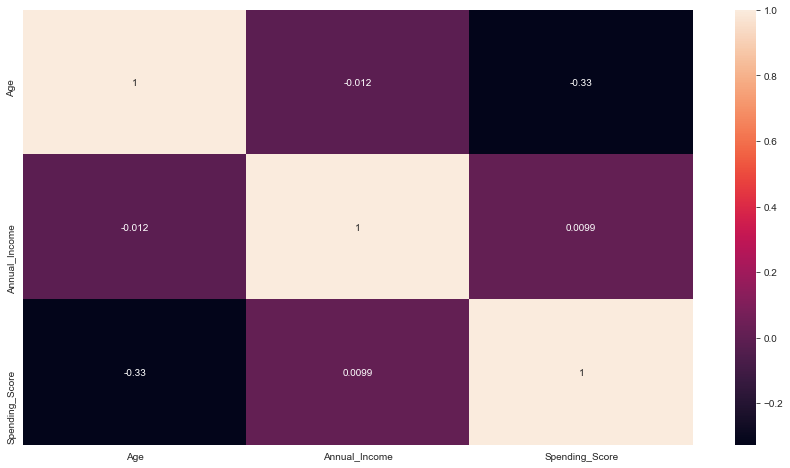

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()
# Features larımız aralarındaki correlation kontrol ediyoruz.

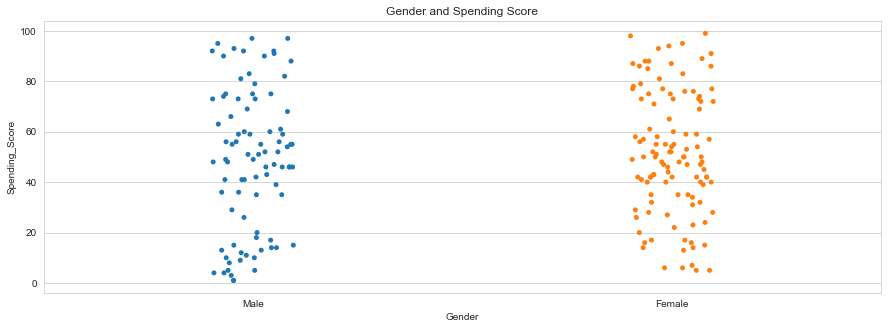

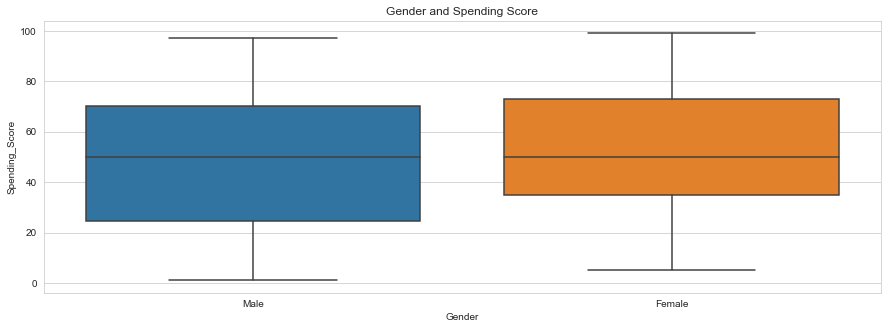

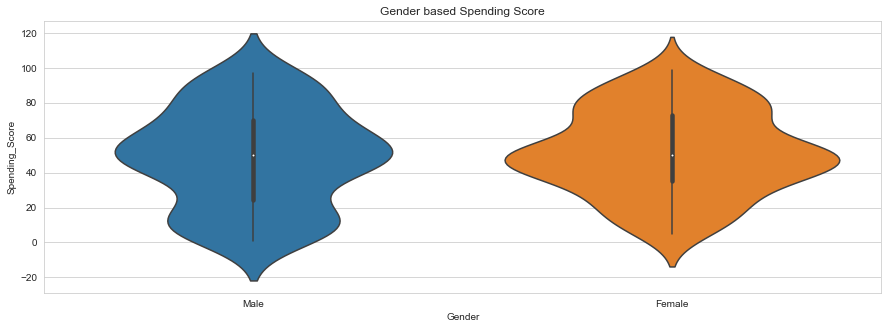

In [16]:
plt.figure(figsize=(15,5))
sns.stripplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender based Spending Score')
plt.show()
# Cinsiyete göre Spending_Score farklı grafiklerle kontrol ediyoruz. Fazla fark olmadığını gözlemliyoruz. 

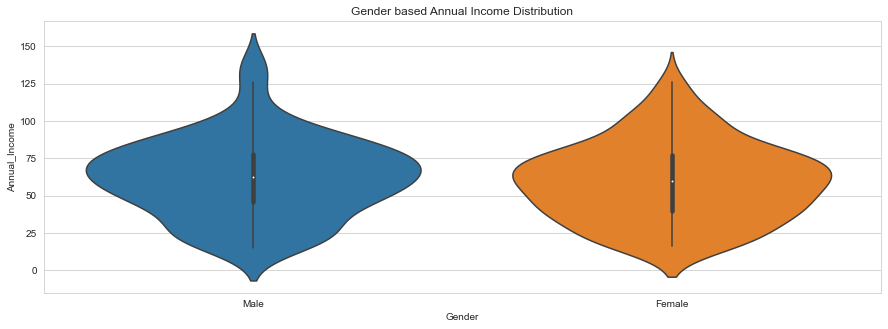

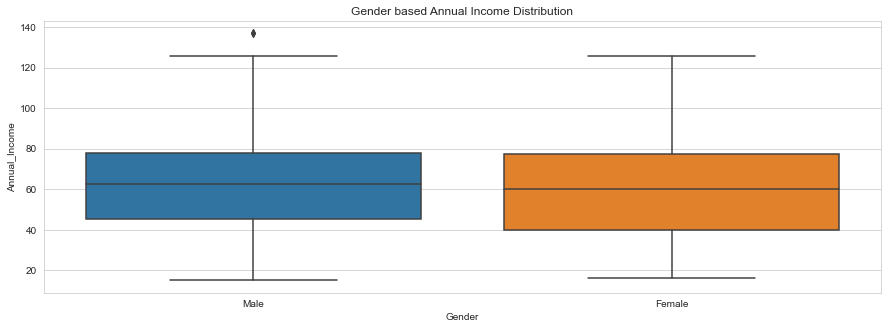

In [17]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()
# Cinsiyete göre Annual_Income mı kontrol ediyoruz. Burada da fazla bir fark göremiyoruz (Kümeleme yapabilmek için). Cinsiyet bize kümeleme için bir insight sağlamadı. 

<Figure size 1152x576 with 0 Axes>

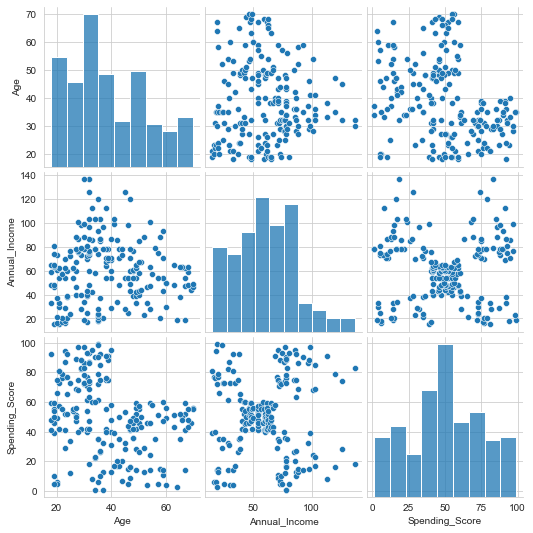

In [18]:
plt.figure(figsize=(16, 8))
sns.pairplot(df)
plt.show()

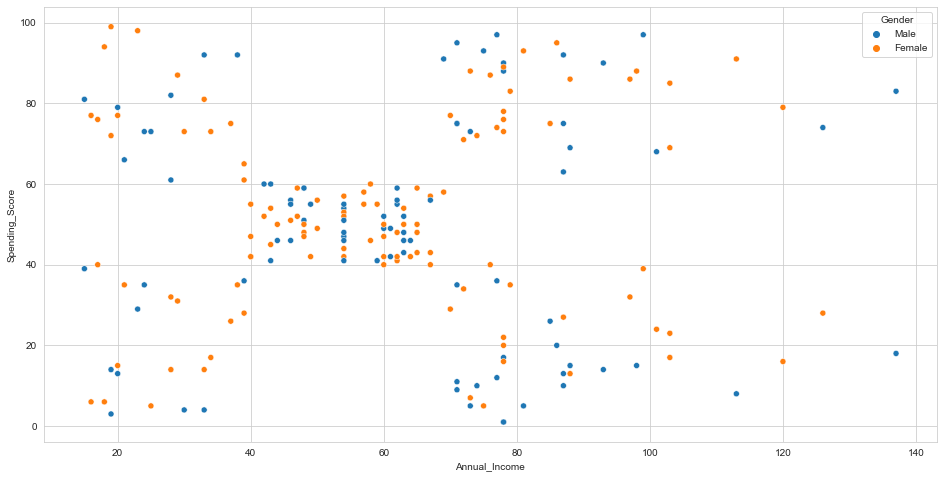

In [19]:
#fig, ax = plt.subplots(figsize=(16, 8))
#sns.scatterplot(df['Annual_Income'], df['Spending_Score'], ax=ax, hue="Gender", data=df)
#plt.show()

plt.figure(figsize=(16,8))
sns.scatterplot(x ='Annual_Income', y='Spending_Score', data=df, hue = "Gender")
plt.show()

# 'Annual_Income'  ve 'Spending_Score' scatterplot ile kontrol ettiğimizde bazı kümelenmelerin olduğunu görüyoruz.

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
# !pip install pyclustertend

In [20]:
df_2 = df.drop(columns="Gender")

In [21]:
from pyclustertend import hopkins

In [22]:
hopkins(df_2,df_2.shape[0])

0.30569499627033864

In [23]:
#x1 = pd.DataFrame(df.loc[:,['Age','Spending_Score']].values, columns = ['Age','Spending_Score'])
#x1

x1 = df.loc[:,['Age','Spending_Score']]
x1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [24]:
hopkins(x1, x1.shape[0])

0.3066805005789007

#### *ii. Determine optimal number of clusters*

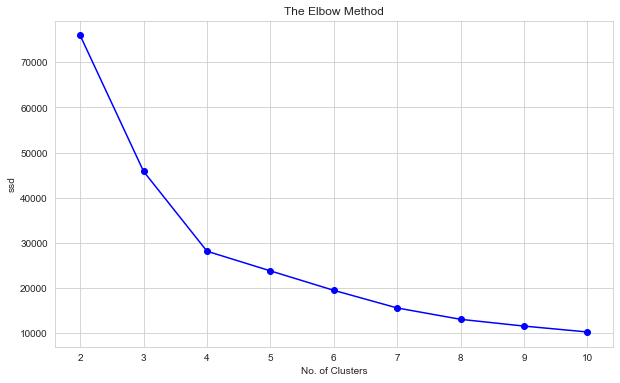

In [25]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(x1)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [ ]:
ssd

In [ ]:
pd.Series(ssd).diff()

In [ ]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

In [ ]:
df_diff.plot(kind='bar')

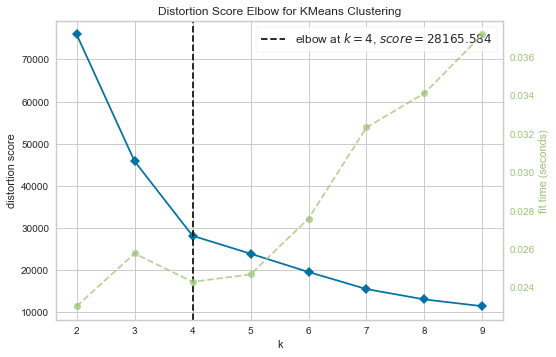

In [29]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x1)
visu.poof()

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

#### *iii. Apply K Means*

In [32]:
kmeans = KMeans(n_clusters = 4)

In [ ]:
kmeans.fit_predict(x1)

In [ ]:
kmeans.fit(x1)

In [ ]:
kmeans.labels_

In [ ]:
y_means = kmeans.fit_predict(x1)
# Sadece fit olarak ta kullanabiliriz. fit_predict de yukarıdaki gibi direk sonuçları gösteriyor. fit de ayrıca label_ da kullanmamız gerekiyor.

In [33]:
x1["cluster"] = kmeans.fit_predict(x1)
# x1['cluster'] = y_means # second way

In [34]:
x1

,Age,Spending_Score,cluster
0,19,39,0
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,0
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

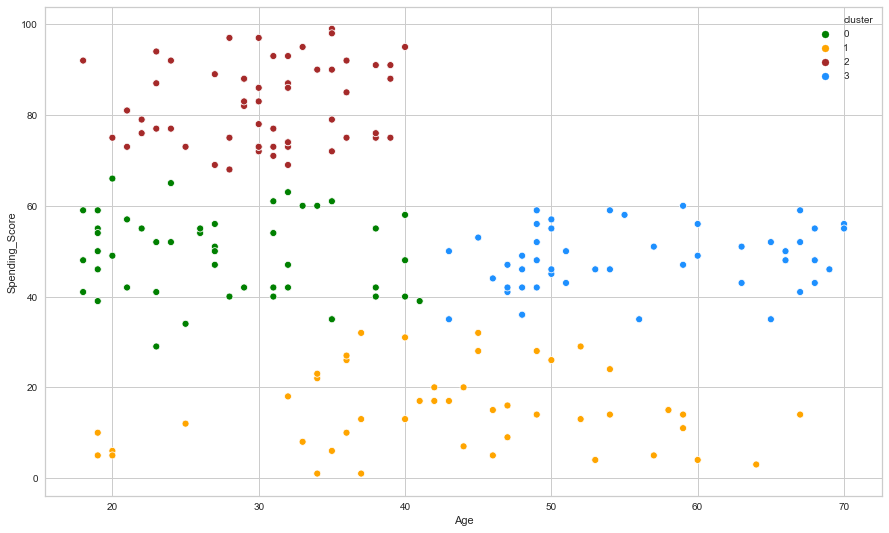

In [35]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=x1,palette=['green','orange','brown','dodgerblue'], legen
                d='full')
# Yaş arrtıkça harcama score nun düştüğünü gözlemliyoruz. Acaba yaş sıkıntısından dolayı markete gidemiyor veya internetten alışveriş yapamıyor mu?

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [36]:
x2 = pd.DataFrame(df.loc[:,['Annual_Income','Spending_Score']].values,columns=['Annual_Income','Spending_Score'])
x2

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [37]:
from pyclustertend import hopkins
hopkins(x2,x2.shape[0])

0.3050615284699266

#### *ii. Determine optimal number of clusters*

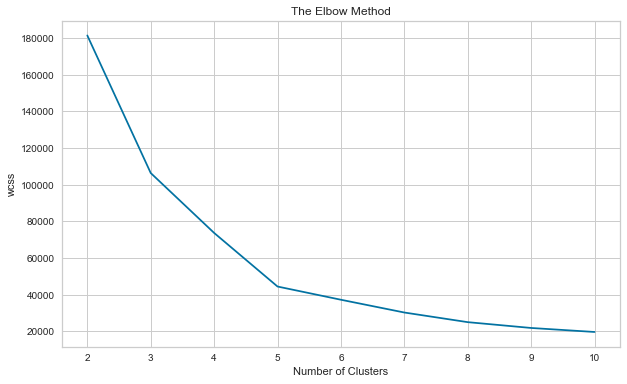

In [38]:
from sklearn.cluster import KMeans

wcss =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()
# Keskin düşüş 5 te başlıyor.

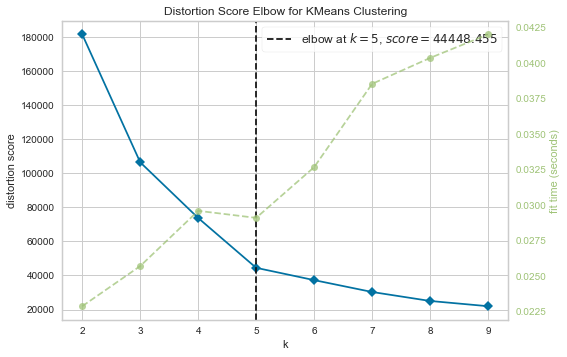

In [39]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x2)
visu.poof()
# Yellowbrick te 5 olarak belirledi.

#### *iii. Apply K Means*

In [44]:
kmeansmodel = KMeans(n_clusters=5)
y_means = kmeansmodel.fit_predict(x2)
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [45]:
x2['cluster'] = y_means
x2

,Annual_Income,Spending_Score,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


#### *iv. Visualizing and Labeling All the Clusters*

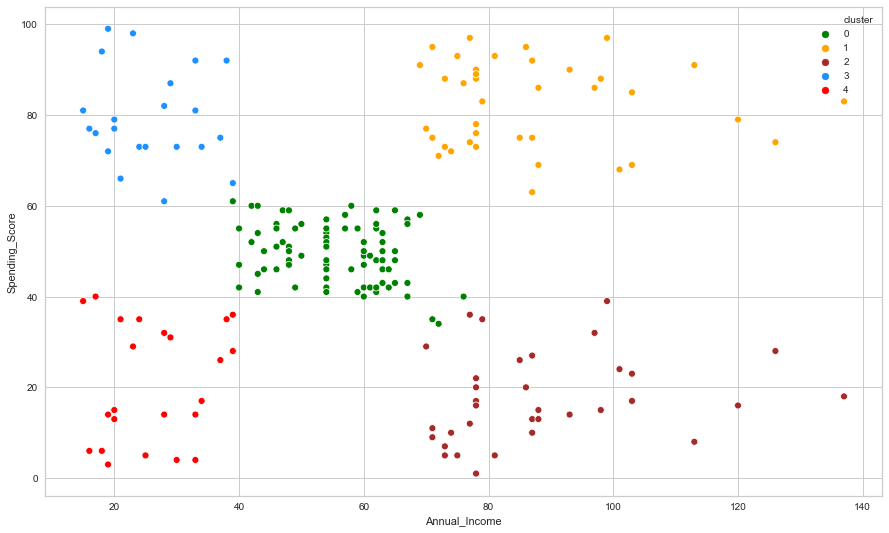

In [46]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=x2,palette=['green','orange','brown','dodgerblue','red'], legend='full')
# İstatiksel olarak hesaplandığında şirketlere en fazla geliri (%80) yıllık geliri yüksek ve harcamaları yüksek olan müsterilerin (1) sağladığı gözlemlenmiş. Bu yüzden amacımız yıllık geliri yüksek olduğu halde az harcama yapanları (2) fazla harcama yapananlara (1) yaklaştırmalıyız.

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

In [48]:
from scipy.cluster.hierarchy import linkage

In [49]:
hc_complete = linkage(x1, "complete")
hc_ward = linkage(x1, "ward")

In [50]:
from scipy.cluster.hierarchy import dendrogram

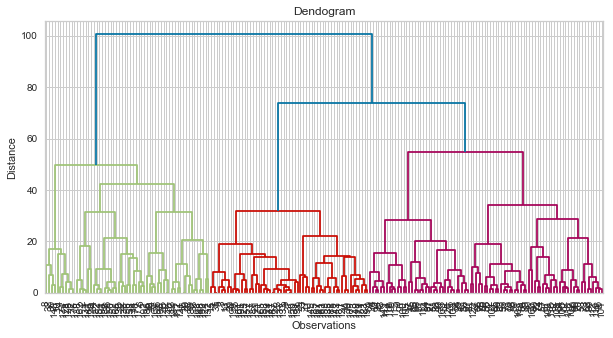

In [51]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
          leaf_font_size = 10);

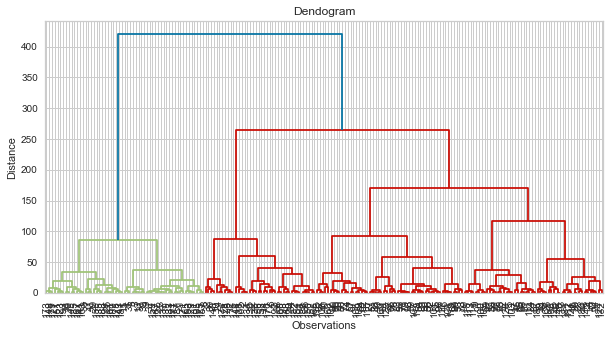

In [52]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
          leaf_font_size = 10);

In [53]:
hc_complete = linkage(x2, "complete")
hc_ward = linkage(x2, "ward")

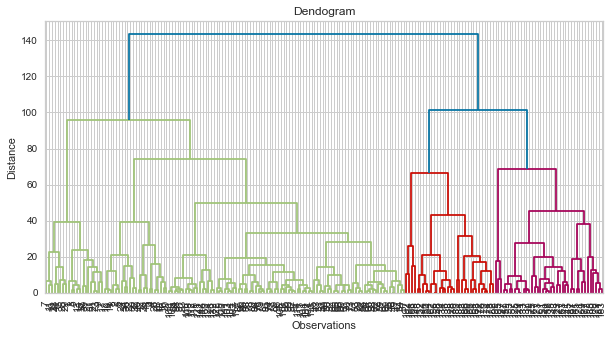

In [54]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
          leaf_font_size = 10);

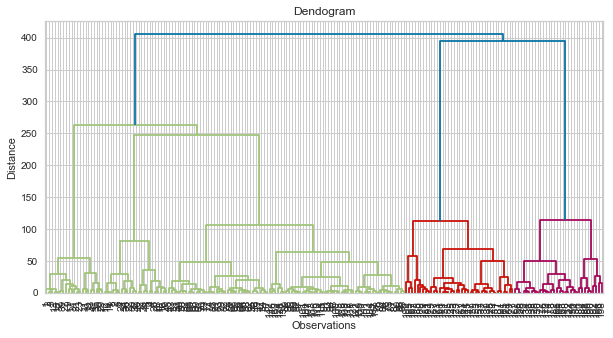

In [55]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
          leaf_font_size = 10);

#### ii. *Apply Agglomerative Clustering*

In [57]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg = cluster.fit_predict(x1)

In [58]:
x1['cluster2'] = y_agg
x1

,Age,Spending_Score,cluster,cluster2
0,19,39,0,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,0,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


In [59]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = cluster.fit_predict(x2)

In [60]:
x2['cluster2'] = y_agg2
x2

,Annual_Income,Spending_Score,cluster,cluster2
0,15,39,4,4
1,15,81,3,3
2,16,6,4,4
3,16,77,3,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,2,0
197,126,74,1,2
198,137,18,2,0


#### iii. *Visualizing and Labeling All the Clusters* 

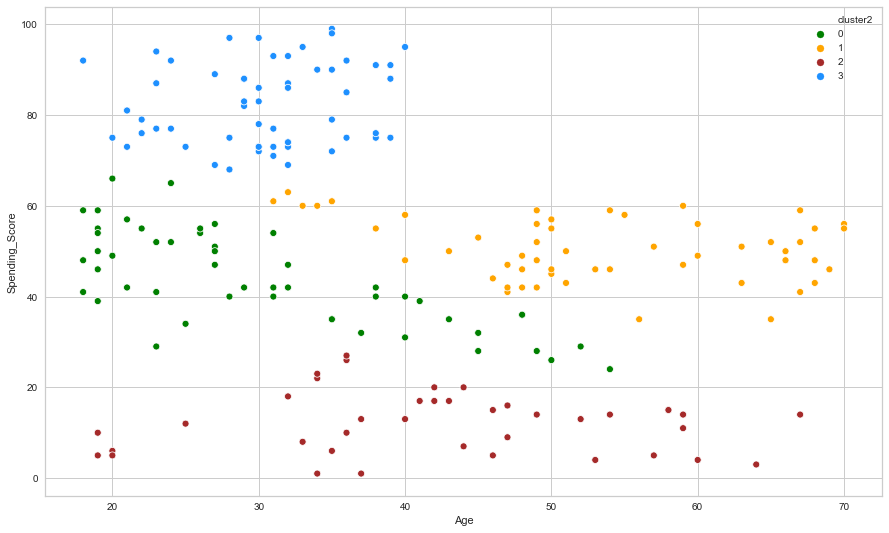

In [61]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Age', y='Spending_Score', hue='cluster2', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

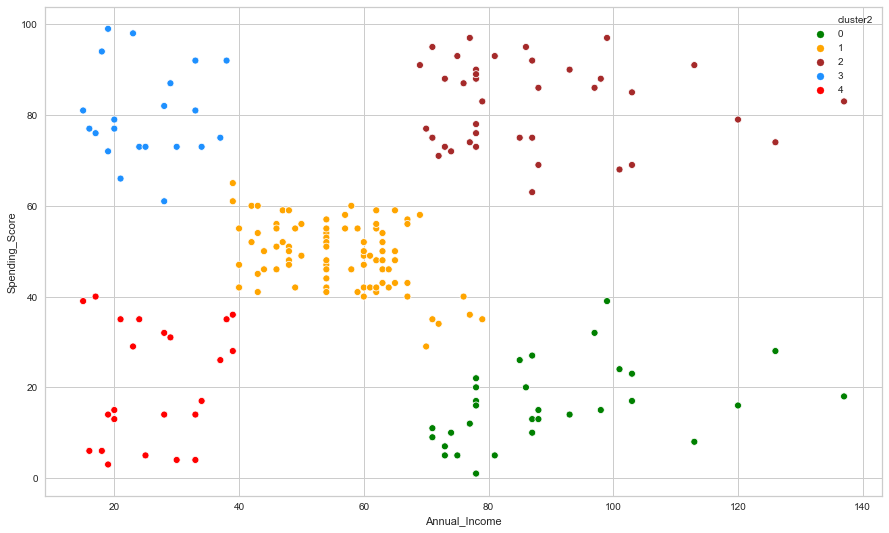

In [62]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster2', data=x2,palette=['green','orange','brown','dodgerblue','red'])

In [63]:
df['cluster'] = y_agg2
df

,Gender,Age,Annual_Income,Spending_Score,cluster
0,0,19,15,39,4
1,0,21,15,81,3
2,1,20,16,6,4
3,1,23,16,77,3
4,1,31,17,40,4
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,0
197,0,32,126,74,2
198,0,32,137,18,0


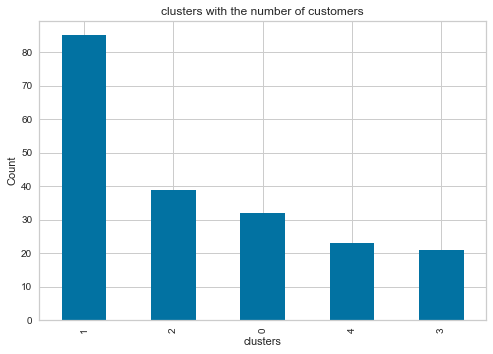

In [64]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
df.cluster.value_counts().plot(kind='bar')

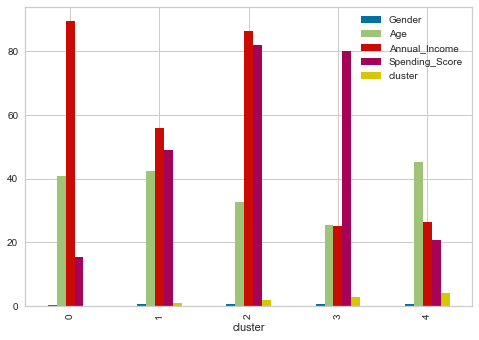

In [65]:
df.groupby(df.cluster).mean().plot(kind='bar')
plt.show()

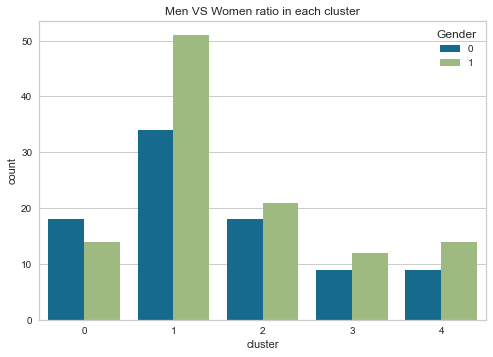

In [67]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
sns.countplot(x=df.cluster, hue=df.Gender)
plt.show()

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___